# Train Set & Test Set의 필요성
- 앞 장의 방법과 같이 문제와 답을 모두 알려주고 해당 범위 내에서 점수를 내면 항상 100점이 나온다.
- 하나의 DataSet을 Train, Test 부분으로 분리하여 Train으로 학습하고 Test로 검증을 해야 모델의 정확도를 신뢰할 수 있다.

In [1]:
# Data 불러오기
import pandas as pd

In [2]:
fruits = pd.read_csv('../data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Train Set, Test Set 분리하기

In [4]:
# Train Set
train_input = fruits.loc[:34, ['length','weight']]
train_input.tail()

,length,weight
30,38.5,920.0
31,38.5,955.0
32,39.5,925.0
33,41.0,975.0
34,41.0,950.0


In [5]:
# target
train_target = fruits.loc[:34, 'name']
train_target.tail()

30    apple
31    apple
32    apple
33    apple
34    apple
Name: name, dtype: object

In [6]:
len(train_input) == len(train_target)

True

In [7]:
# Test Set
test_input = fruits.loc[35:, ['length','weight']]
test_input.tail()

,length,weight
44,12.2,12.2
45,12.4,13.4
46,13.0,12.2
47,14.3,19.7
48,15.0,19.9


In [9]:
# target
test_target = fruits.loc[35:, 'name']
test_target.tail()

44    berry
45    berry
46    berry
47    berry
48    berry
Name: name, dtype: object

In [10]:
len(test_input) == len(test_target)

True

In [11]:
### KNN을 이용한 분류
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn = KNeighborsClassifier()

In [16]:
# train 학습시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [17]:
# Test Data로 정확성 확인
kn.score(test_input, test_target)

0.0

> Train, Test 구분시 sampling 편향이 발생했다.   
> apple만 학습하고 berry를 물어봤다.

In [18]:
### Numby를 이용하여 sampling 편향 제거하기
import numpy as np

In [21]:
np.random.seed(42) # random sample을 하나로 정의하여 다른 모델에서 동일 값으로 테스트 가능

index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [22]:
# Train으로 사용될 index 출력하기
index[0:35]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [23]:
# Train Data 구성하기
train_input = fruits.loc[list(index[0:35]), ['length','weight']]
train_input.head()

,length,weight
13,32.0,340.0
45,12.4,13.4
47,14.3,19.7
44,12.2,12.2
17,33.0,700.0


In [24]:
# Train Target
train_target = fruits.loc[list(index[0:35]), 'name']
train_target.head()

13    apple
45    berry
47    berry
44    berry
17    apple
Name: name, dtype: object

In [25]:
# 개수 확인
len(train_input) == len(train_target)

True

In [26]:
# Test로 사용될 index 출력하기
print(index[35:])

[37 35 23 39 10 22 18 48 20  7 42 14 28 38]


In [27]:
# Test Data 구성
test_input = fruits.loc[list(index[35:]), ['length','weight']]
test_input.head()

,length,weight
37,10.6,7.0
35,9.8,6.7
23,35.0,680.0
39,11.2,9.8
10,31.0,475.0


In [28]:
# Test Target
test_target = fruits.loc[list(index[35:]), 'name']
test_target.head()

37    berry
35    berry
23    apple
39    berry
10    apple
Name: name, dtype: object

In [29]:
# 개수 확인
len(test_input) == len(test_target)

True

### Data 분포를 산점도로 확인하기

In [31]:
# scatter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

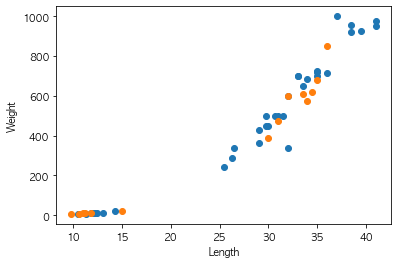

In [34]:
plt.scatter(train_input.length, train_input.weight)
plt.scatter(test_input.length, test_input.weight)

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

> 데이터가 잘 섞여있구나

### KNN을 이용한 분류

In [35]:
# train 학습시키기
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [37]:
# 정확도 확인
kn.score(test_input, test_target)

1.0

> 이정도 데이터를 1의 확률로 못 맞추면 그 모델은 의미 없다

---
### sciketLearn으로 Train Set, Test Set 나누기

In [38]:
from sklearn.model_selection import train_test_split # 알아서 나눠줌

In [40]:
# Feature, Target 분리
fruits_data = fruits[['length', 'weight']]
fruits_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [41]:
fruits_target = fruits['name']
fruits_target.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

In [42]:
train_input, test_input, train_target, test_target = train_test_split(fruits_data, fruits_target, random_state=42) # random_state : set seed

In [43]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [44]:
import collections # 빈도수 세기
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 10, 'berry': 3})


In [46]:
# apple의 개수
len(fruits[fruits.name=='apple'])

35

In [47]:
# berry의 개수
len(fruits[fruits.name=='berry'])

14

In [48]:
# apple과 berry의 개수 비율
len(fruits[fruits.name=='apple']) / len(fruits[fruits.name=='berry'])

2.5

In [49]:
10 / 3

3.3333333333333335

> test_target의 빈도수와 train_test_split의 샘플링 비율이 다르다.

In [50]:
# 분류(classification)시 데이터가 동일한 비율로 섞이게 하기
train_input, test_input, train_target, test_target = train_test_split(
    fruits_data, 
    fruits_target, 
    stratify=fruits_target, # test와 train의 target 비율을 fruit_target 비율과 일치시킨다.
    random_state=42) # random_state : set seed

In [51]:
counts = collections.Counter(test_target)
print(counts)

Counter({'apple': 9, 'berry': 4})


In [52]:
9 / 4

2.25

> 2.5 에 유사하게 변했다 3.333 -> 2.25

In [53]:
# 학습
kn.fit(train_input, train_target)
# 정확도
kn.score(test_input, test_target)

1.0

In [57]:
fruits_target.value_counts()

apple    35
berry    14
Name: name, dtype: int64